In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
dataFrame = pd.read_csv("alzheimer.csv")

In [4]:
dataFrame.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
dataFrame.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [6]:
dataFrame.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
imputer = SimpleImputer(missing_values= np.nan, strategy= "mean")

In [9]:
meanValue = dataFrame.iloc[:,4:6].values

In [10]:
meanValue

array([[ 2., 27.],
       [ 2., 30.],
       [nan, 23.],
       [nan, 28.],
       [nan, 22.],
       [ 3., 28.],
       [ 3., 27.],
       [ 4., 28.],
       [ 4., 29.],
       [ 4., 30.],
       [nan, 28.],
       [nan, 27.],
       [nan, 27.],
       [ 2., 30.],
       [ 2., 29.],
       [ 2., 27.],
       [ 2., 24.],
       [ 3., 30.],
       [ 3., 29.],
       [ 2., 29.],
       [ 2., 29.],
       [ 2., 29.],
       [ 4., 30.],
       [ 4., 30.],
       [ 4., 29.],
       [ 3., 21.],
       [ 3., 16.],
       [ 4., 25.],
       [ 4., 23.],
       [ 3., 29.],
       [ 3., 27.],
       [ 3., 30.],
       [ 3., 27.],
       [ 1., 30.],
       [ 1., 29.],
       [ 1., 27.],
       [ 1., 29.],
       [ 1., 28.],
       [ 1., 26.],
       [ 1., 26.],
       [ 1., 25.],
       [ 3., 30.],
       [ 3., 29.],
       [ 4., 21.],
       [ 4., 21.],
       [ 3., 27.],
       [ 3., 27.],
       [ 3., 29.],
       [ 3., 30.],
       [ 3., 30.],
       [ 3., 30.],
       [ 2., 22.],
       [ 2.,

In [11]:
imputer = imputer.fit(meanValue)

In [12]:
meanValue = imputer.transform(meanValue)

In [13]:
dataFrame

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


/var/folders/7s/tq2h5mjn0bv_qd2v2dp2b2kr0000gn/T/ipykernel_38047/4032965871.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["Age"])


<Axes: xlabel='Age', ylabel='Density'>

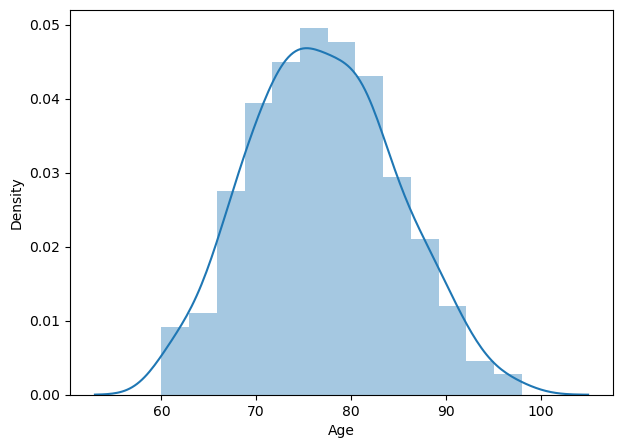

In [13]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["Age"])

/var/folders/7s/tq2h5mjn0bv_qd2v2dp2b2kr0000gn/T/ipykernel_38047/1232284646.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["EDUC"])


<Axes: xlabel='EDUC', ylabel='Density'>

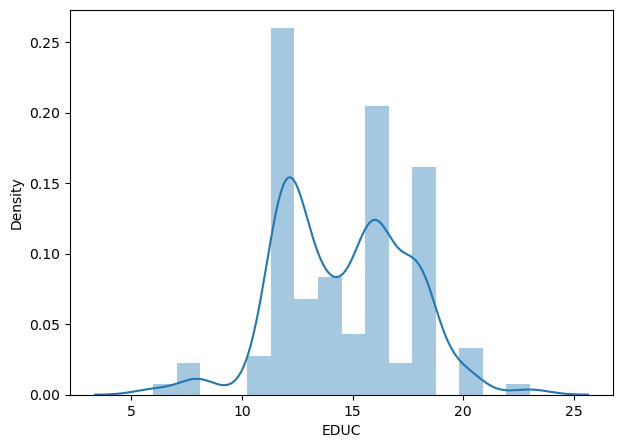

In [14]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["EDUC"])

/var/folders/7s/tq2h5mjn0bv_qd2v2dp2b2kr0000gn/T/ipykernel_38047/3762256088.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["SES"])


<Axes: xlabel='SES', ylabel='Density'>

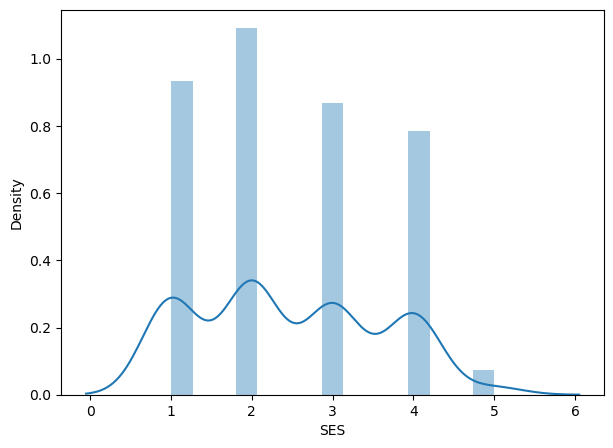

In [15]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["SES"])

/var/folders/7s/tq2h5mjn0bv_qd2v2dp2b2kr0000gn/T/ipykernel_38047/469414993.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["MMSE"])


<Axes: xlabel='MMSE', ylabel='Density'>

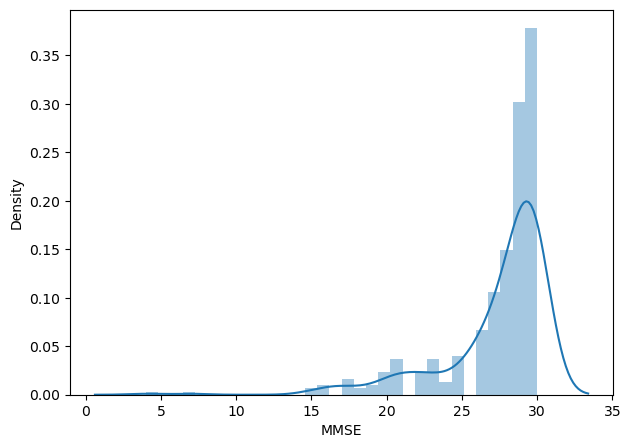

In [16]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["MMSE"])

/var/folders/7s/tq2h5mjn0bv_qd2v2dp2b2kr0000gn/T/ipykernel_38047/1567607180.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["CDR"])


<Axes: xlabel='CDR', ylabel='Density'>

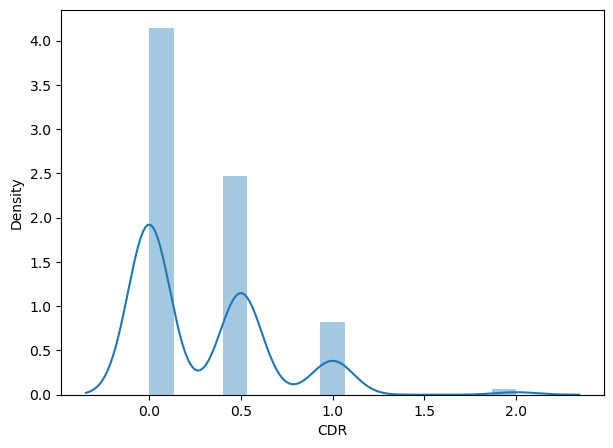

In [17]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["CDR"])

/var/folders/7s/tq2h5mjn0bv_qd2v2dp2b2kr0000gn/T/ipykernel_38047/2328558344.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["eTIV"])


<Axes: xlabel='eTIV', ylabel='Density'>

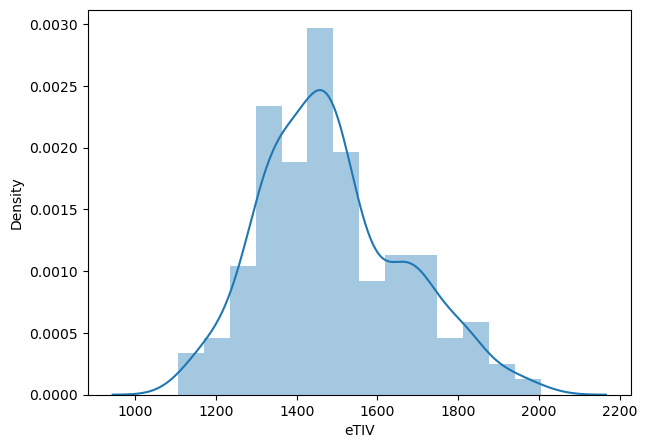

In [18]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["eTIV"])

/var/folders/7s/tq2h5mjn0bv_qd2v2dp2b2kr0000gn/T/ipykernel_38047/3152167349.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["nWBV"])


<Axes: xlabel='nWBV', ylabel='Density'>

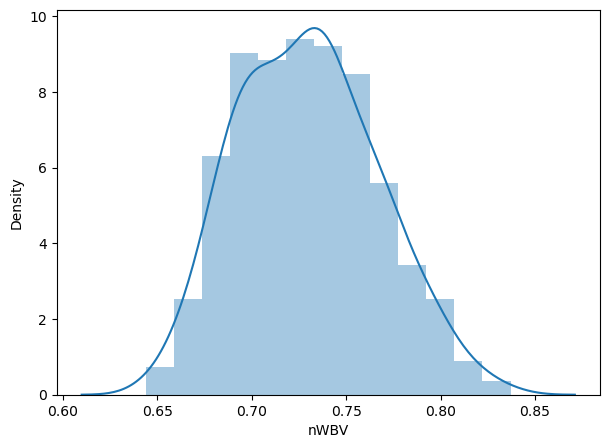

In [19]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["nWBV"])

/var/folders/7s/tq2h5mjn0bv_qd2v2dp2b2kr0000gn/T/ipykernel_38047/682690731.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame["ASF"])


<Axes: xlabel='ASF', ylabel='Density'>

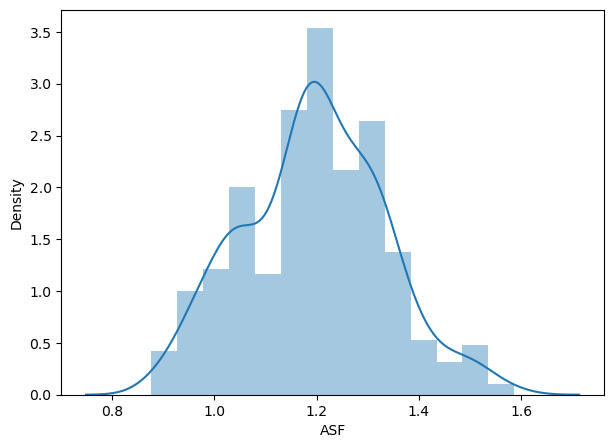

In [20]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["ASF"])

In [21]:
teshis = dataFrame.iloc[:,0:1].values

In [22]:
teshis

array([['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       

In [23]:
from sklearn import preprocessing

In [24]:
ohe = preprocessing.OneHotEncoder()

In [25]:
teshis = ohe.fit_transform(teshis).toarray()

In [26]:
teshis

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [27]:
sonuc = pd.DataFrame(data=teshis, index=range(373), columns= ["Converted","Demented","Nondemented"])

In [28]:
sonuc.head()

,Converted,Demented,Nondemented
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [29]:
cinsiyet = dataFrame.iloc[:,1:2].values

In [30]:
cinsiyet

array([['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['F'],
       ['F'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['F'],
       ['F'],
       ['M'],
       ['M'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['F'],
       ['F'],
       ['F'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
       ['M'],
       ['M'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
       ['M'],
       ['M'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
       ['M'],
       ['M'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
       ['F'],
      

In [31]:
le = preprocessing.LabelEncoder()

In [32]:
cinsiyet = le.fit_transform(cinsiyet)

/Users/yarenuyaroglu/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
cinsiyet

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [34]:
sonuc2 = pd.DataFrame(data= cinsiyet, index=range(373), columns= ["M/F"])

In [35]:
sonuc2

,M/F
0,1
1,1
2,1
3,1
4,1
...,...
368,1
369,1
370,0
371,0


In [36]:
age_educ = dataFrame.iloc[:,2:4].values

In [37]:
sonuc3 = pd.DataFrame(data=age_educ , index=range(373), columns= ["Age","EDUC"])

In [38]:
sonuc3

,Age,EDUC
0,87,14
1,88,14
2,75,12
3,76,12
4,80,12
...,...,...
368,82,16
369,86,16
370,61,13
371,63,13


In [39]:
sonuc4= pd.DataFrame(data= meanValue, index=range(373), columns= ["SES", "MMSE"])

In [40]:
sonuc4.head()

,SES,MMSE
0,2.000000,27.0
1,2.000000,30.0
2,2.460452,23.0
3,2.460452,28.0
4,2.460452,22.0


In [41]:
geriKalan = dataFrame.iloc[:,6:10].values

In [42]:
sonuc5= pd.DataFrame(data= geriKalan, index=range(373), columns= ["CDR", "eTIV", "nWBV", "ASF"])

In [43]:
sonuc5

,CDR,eTIV,nWBV,ASF
0,0.0,1987.0,0.696,0.883
1,0.0,2004.0,0.681,0.876
2,0.5,1678.0,0.736,1.046
3,0.5,1738.0,0.713,1.010
4,0.5,1698.0,0.701,1.034
...,...,...,...,...
368,0.5,1693.0,0.694,1.037
369,0.5,1688.0,0.675,1.040
370,0.0,1319.0,0.801,1.331
371,0.0,1327.0,0.796,1.323


In [44]:
s1=pd.concat ([sonuc,sonuc2], axis=1)


In [45]:
s1

,Converted,Demented,Nondemented,M/F
0,0.0,0.0,1.0,1
1,0.0,0.0,1.0,1
2,0.0,1.0,0.0,1
3,0.0,1.0,0.0,1
4,0.0,1.0,0.0,1
...,...,...,...,...
368,0.0,1.0,0.0,1
369,0.0,1.0,0.0,1
370,0.0,0.0,1.0,0
371,0.0,0.0,1.0,0


In [46]:
s2=pd.concat ([s1,sonuc3], axis=1)

In [47]:
s2

,Converted,Demented,Nondemented,M/F,Age,EDUC
0,0.0,0.0,1.0,1,87,14
1,0.0,0.0,1.0,1,88,14
2,0.0,1.0,0.0,1,75,12
3,0.0,1.0,0.0,1,76,12
4,0.0,1.0,0.0,1,80,12
...,...,...,...,...,...,...
368,0.0,1.0,0.0,1,82,16
369,0.0,1.0,0.0,1,86,16
370,0.0,0.0,1.0,0,61,13
371,0.0,0.0,1.0,0,63,13


In [48]:
s3=pd.concat ([s2,sonuc4], axis=1)

In [49]:
s3

,Converted,Demented,Nondemented,M/F,Age,EDUC,SES,MMSE
0,0.0,0.0,1.0,1,87,14,2.000000,27.0
1,0.0,0.0,1.0,1,88,14,2.000000,30.0
2,0.0,1.0,0.0,1,75,12,2.460452,23.0
3,0.0,1.0,0.0,1,76,12,2.460452,28.0
4,0.0,1.0,0.0,1,80,12,2.460452,22.0
...,...,...,...,...,...,...,...,...
368,0.0,1.0,0.0,1,82,16,1.000000,28.0
369,0.0,1.0,0.0,1,86,16,1.000000,26.0
370,0.0,0.0,1.0,0,61,13,2.000000,30.0
371,0.0,0.0,1.0,0,63,13,2.000000,30.0


In [50]:
s4=pd.concat ([s3,sonuc5], axis=1)

In [51]:
s4

,Converted,Demented,Nondemented,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0.0,0.0,1.0,1,87,14,2.000000,27.0,0.0,1987.0,0.696,0.883
1,0.0,0.0,1.0,1,88,14,2.000000,30.0,0.0,2004.0,0.681,0.876
2,0.0,1.0,0.0,1,75,12,2.460452,23.0,0.5,1678.0,0.736,1.046
3,0.0,1.0,0.0,1,76,12,2.460452,28.0,0.5,1738.0,0.713,1.010
4,0.0,1.0,0.0,1,80,12,2.460452,22.0,0.5,1698.0,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...
368,0.0,1.0,0.0,1,82,16,1.000000,28.0,0.5,1693.0,0.694,1.037
369,0.0,1.0,0.0,1,86,16,1.000000,26.0,0.5,1688.0,0.675,1.040
370,0.0,0.0,1.0,0,61,13,2.000000,30.0,0.0,1319.0,0.801,1.331
371,0.0,0.0,1.0,0,63,13,2.000000,30.0,0.0,1327.0,0.796,1.323


In [52]:
s4.corr()

,Converted,Demented,Nondemented,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Converted,1.000000,-0.266131,-0.338129,-0.052032,0.119302,0.099536,-0.219804,0.120615,-0.030277,-0.054442,-0.052245,0.040773
Demented,-0.266131,1.000000,-0.817174,0.259405,-0.079153,-0.258708,0.196792,-0.609876,0.815473,-0.010392,-0.286903,0.008312
Nondemented,-0.338129,-0.817174,1.000000,-0.222146,0.005941,0.193060,-0.060697,0.523305,-0.778049,0.042700,0.311346,-0.032495
M/F,-0.052032,0.259405,-0.222146,1.000000,-0.037726,0.089279,-0.044525,-0.166521,0.202140,0.572549,-0.249618,-0.561647
Age,0.119302,-0.079153,0.005941,-0.037726,1.000000,-0.027886,-0.046665,0.055607,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.099536,-0.258708,0.193060,0.089279,-0.027886,1.000000,-0.708680,0.194454,-0.153121,0.257015,-0.012200,-0.241752
SES,-0.219804,0.196792,-0.060697,-0.044525,-0.046665,-0.708680,1.000000,-0.146913,0.073393,-0.254271,0.089436,0.246673
MMSE,0.120615,-0.609876,0.523305,-0.166521,0.055607,0.194454,-0.146913,1.000000,-0.679837,-0.031789,0.341857,0.039494
CDR,-0.030277,0.815473,-0.778049,0.202140,-0.026257,-0.153121,0.073393,-0.679837,1.000000,0.022819,-0.344819,-0.029340
eTIV,-0.054442,-0.010392,0.042700,0.572549,0.042348,0.257015,-0.254271,-0.031789,0.022819,1.000000,-0.210122,-0.988877


<Axes: xlabel='CDR', ylabel='Age'>

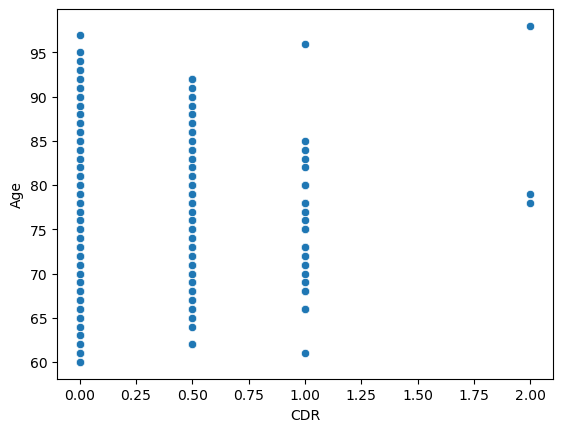

In [72]:
sbn.scatterplot(x="CDR",y="Age",data = dataFrame)

ValueError: Unable to parse string "Nondemented" at position 0